In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import yaml

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

import main
import utils

# Name of results folder to plot.
results_folder = 'experiments/calibrate/serial/output_1_20240621_000000'

with open(f'{results_folder}/config.yaml') as configfile:
    config = yaml.safe_load(configfile)

with open(f'{results_folder}/results_stage1.pkl', 'rb') as file:
    results_dict_stage1 = pickle.load(file)

with open(f'{results_folder}/results_stage2.pkl', 'rb') as file:
    results_dict_stage2 = pickle.load(file)

In [2]:
tau_k_pairs = []
for run_no in results_dict_stage1:
    tau_k_pairs.append([run_no['tau_val'], run_no['k_val']])

map_estimate_stage1 = utils.get_MAP(tau_k_pairs)
print("MAP Estimate (Stage 1):", map_estimate_stage1)

MAP Estimate (Stage 1): [5.13644883 0.5041795 ]


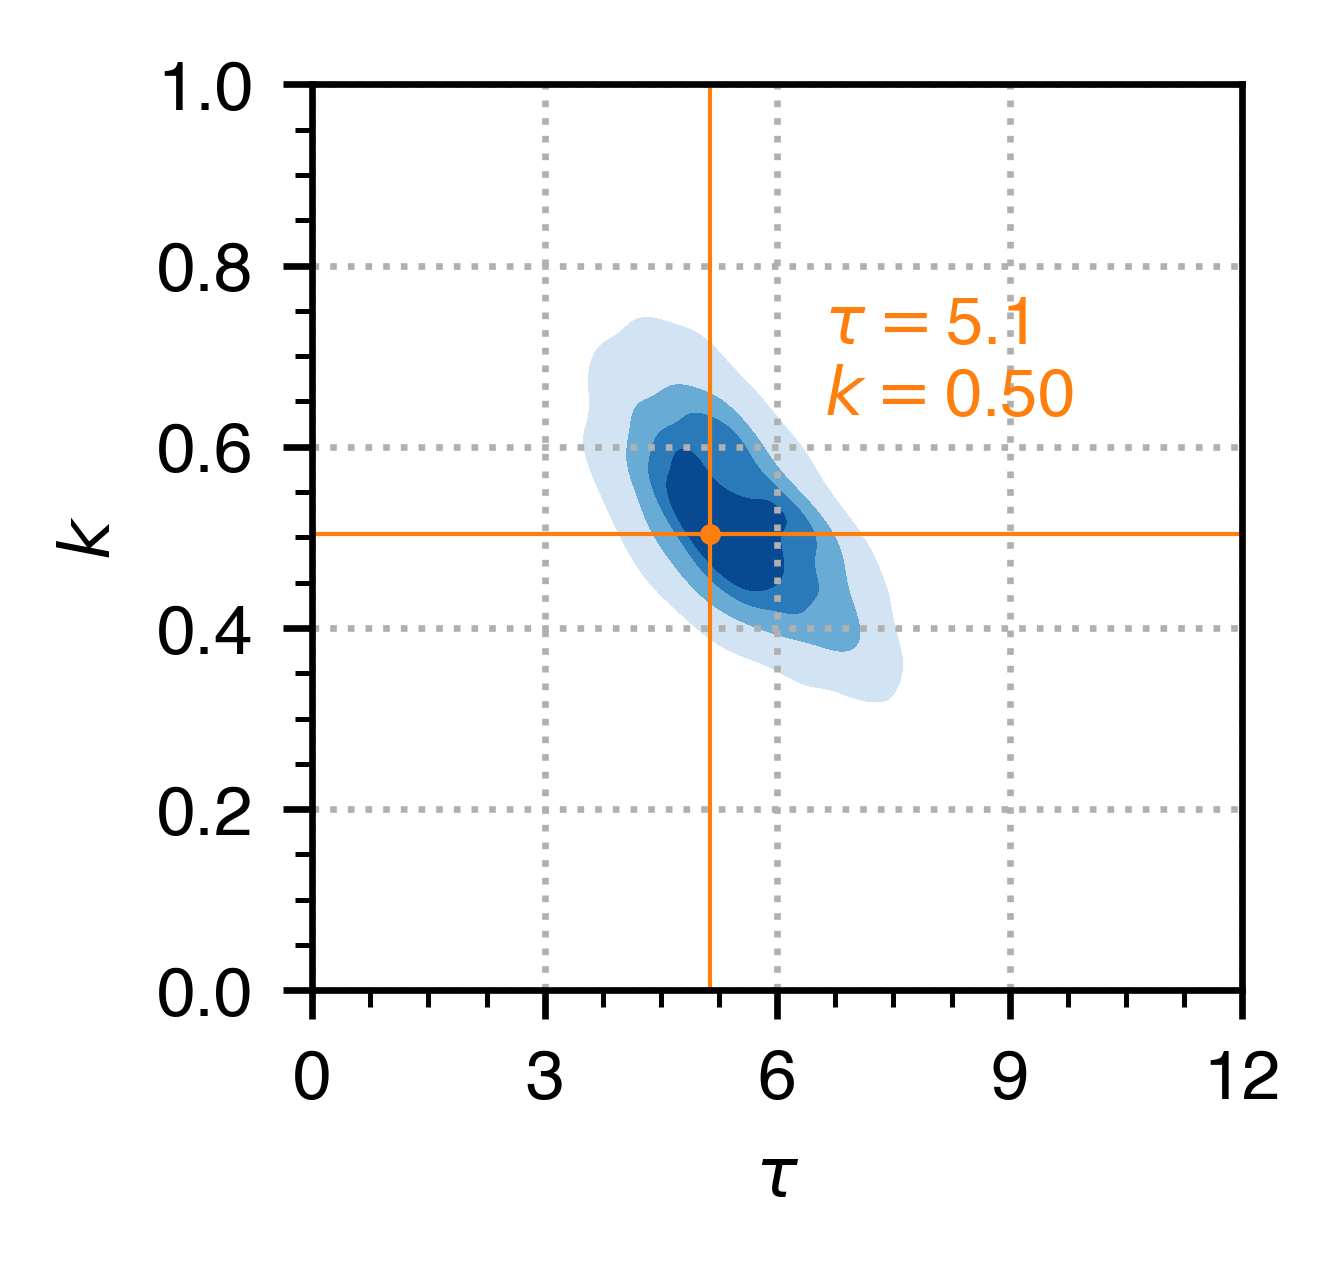

In [3]:
fig, axs = plt.subplots(1, 1, figsize=(2, 2))
fig.dpi = 600

tau_list, k_list = [], []
for run_no in results_dict_stage1:
    tau_list.append(run_no['tau_val'])
    k_list.append(run_no['k_val'])

df = pd.DataFrame.from_dict({'tau': tau_list, 'k': k_list}, orient='columns')
sns.kdeplot(data=df, x='tau', y='k', fill=True, cmap='Blues', ax=axs, levels=5)

axs.set_xlim(0, 12)
axs.set_ylim(0, 1)
axs.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs.set_xticks([0, 3, 6, 9, 12])
axs.set_xlabel(r'$\tau$', fontsize='small')
axs.set_ylabel(r'$k$', fontsize='small')
axs.minorticks_on()
tau_text = f'{map_estimate_stage1[0]:.1f}'
k_text = f'{map_estimate_stage1[1]:.2f}'
axs.axhline(map_estimate_stage1[1], color='#ff7f0e', linewidth=0.5)
axs.axvline(map_estimate_stage1[0], color='#ff7f0e', linewidth=0.5)
axs.plot(map_estimate_stage1[0], map_estimate_stage1[1], '.', color='#ff7f0e', markersize=3)
axs.text(6.6, 0.635, r'$\tau=$' + f'{tau_text}' + '\n' + r'$k=$' + f'{k_text}', fontsize=8, color='#ff7f0e')
axs.grid(True, linestyle=':')
plt.tick_params(axis='both', which='both', labelsize='small')

plt.show()

In [4]:
seed = 16
np.random.seed(seed)

ensemble_count = config['ENSEMBLE_COUNT']
reversal_count = 1
trial_count = config['TRIAL_COUNT']
tau_val = map_estimate_stage1[0]
k_val = map_estimate_stage1[1]
k_decay = 0

run_output_stage1 = main.run_reversal_learning(ensemble_count, reversal_count, trial_count, tau_val, k_val, k_decay)

100%|██████████| 100/100 [00:00<00:00, 199.34it/s]


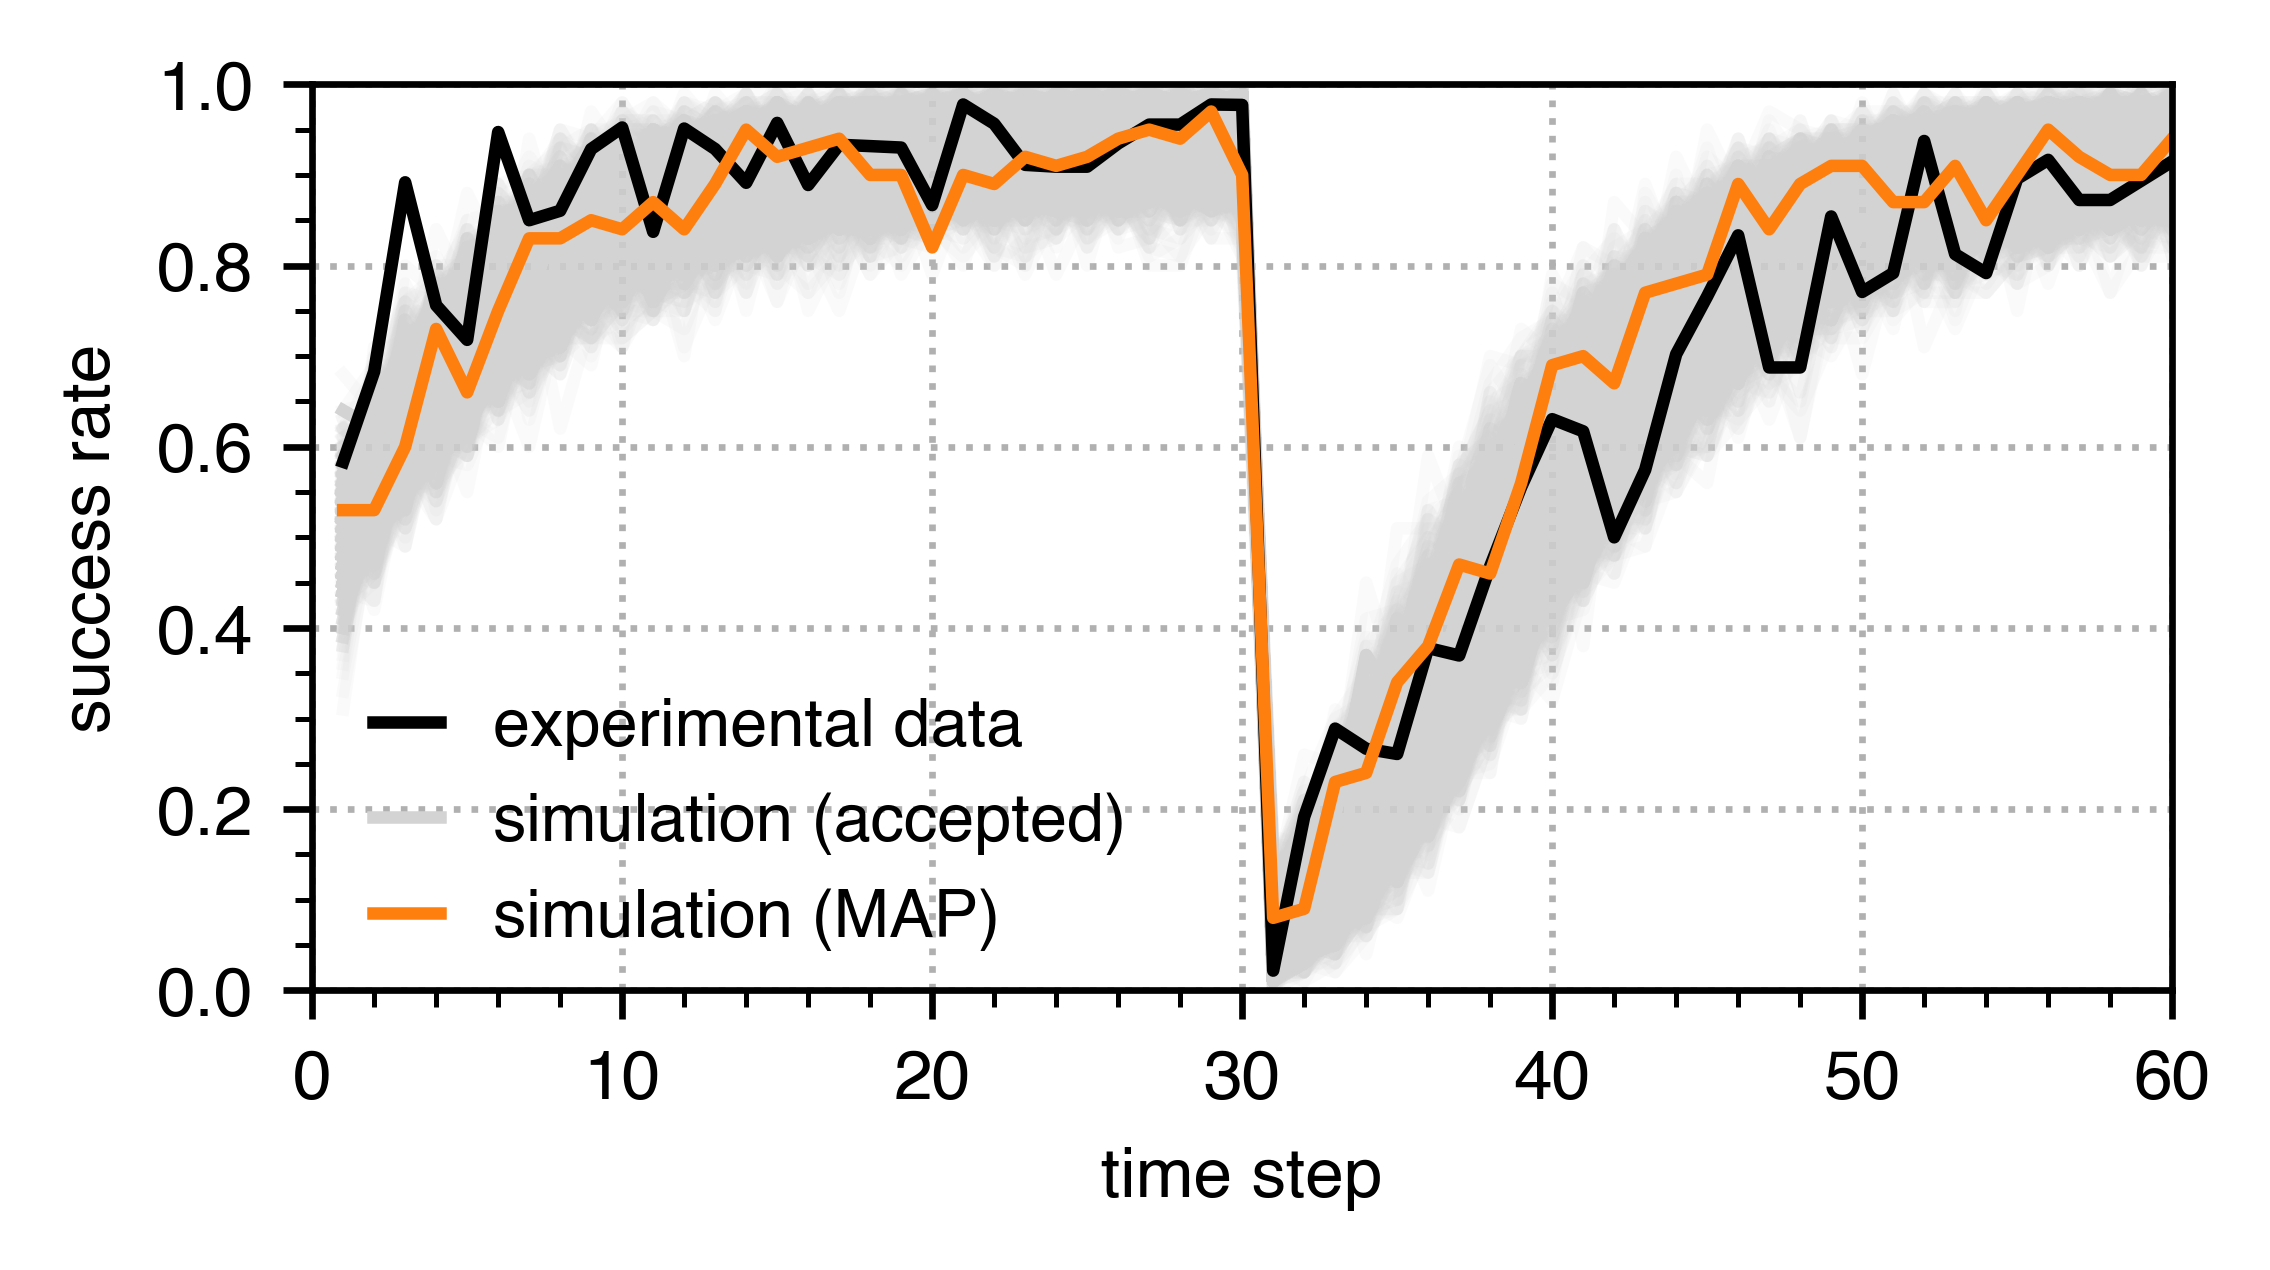

In [5]:
df_target = pd.read_csv('../data/target_data_serial.csv', header=None)
run_target = df_target[0].tolist()
run_target = run_target[:60]

run_list = []
for run_no in results_dict_stage1:
    run_list.append(run_no['run'])

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
fig.dpi = 600

line1, = plt.plot(np.arange(1,61,1), run_list[0], color='lightgrey', linewidth=1.5, alpha=1, label='simulation (accepted)')
for i in run_list:
    plt.plot(np.arange(1,61,1), i, color='lightgrey', linewidth=1.5, alpha=0.1)

line2, = plt.plot(np.arange(1,61,1), run_target, color='black', linewidth=1.5, label='experimental data')
line3, = plt.plot(np.arange(1,61,1), run_output_stage1['run_stat'], color='#ff7f0e', linewidth=1.5, label='simulation (MAP)')

plt.ylabel('success rate', fontsize='small')
plt.xlabel('time step', fontsize='small')
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticks([0, 10, 20, 30, 40, 50, 60])
plt.ylim(0, 1)
plt.xlim(0, 60)
plt.legend(frameon=False, fontsize=8, handlelength=1, bbox_to_anchor=(0.47, 0.39), handles=[line2, line1, line3], labels=['experimental data', 'simulation (accepted)', 'simulation (MAP)'])
ax.minorticks_on()
ax.grid(which='major', linestyle=':')
plt.tick_params(axis='both', which='both', labelsize='small')

plt.show()

In [6]:
kdecay_list = []
for run_no in results_dict_stage2:
    kdecay_list.append(run_no['k_decay'])

map_estimate_stage2 = utils.get_MAP(kdecay_list)
print("MAP Estimate (Stage 2):", map_estimate_stage2)

MAP Estimate (Stage 2): [0.1193621]


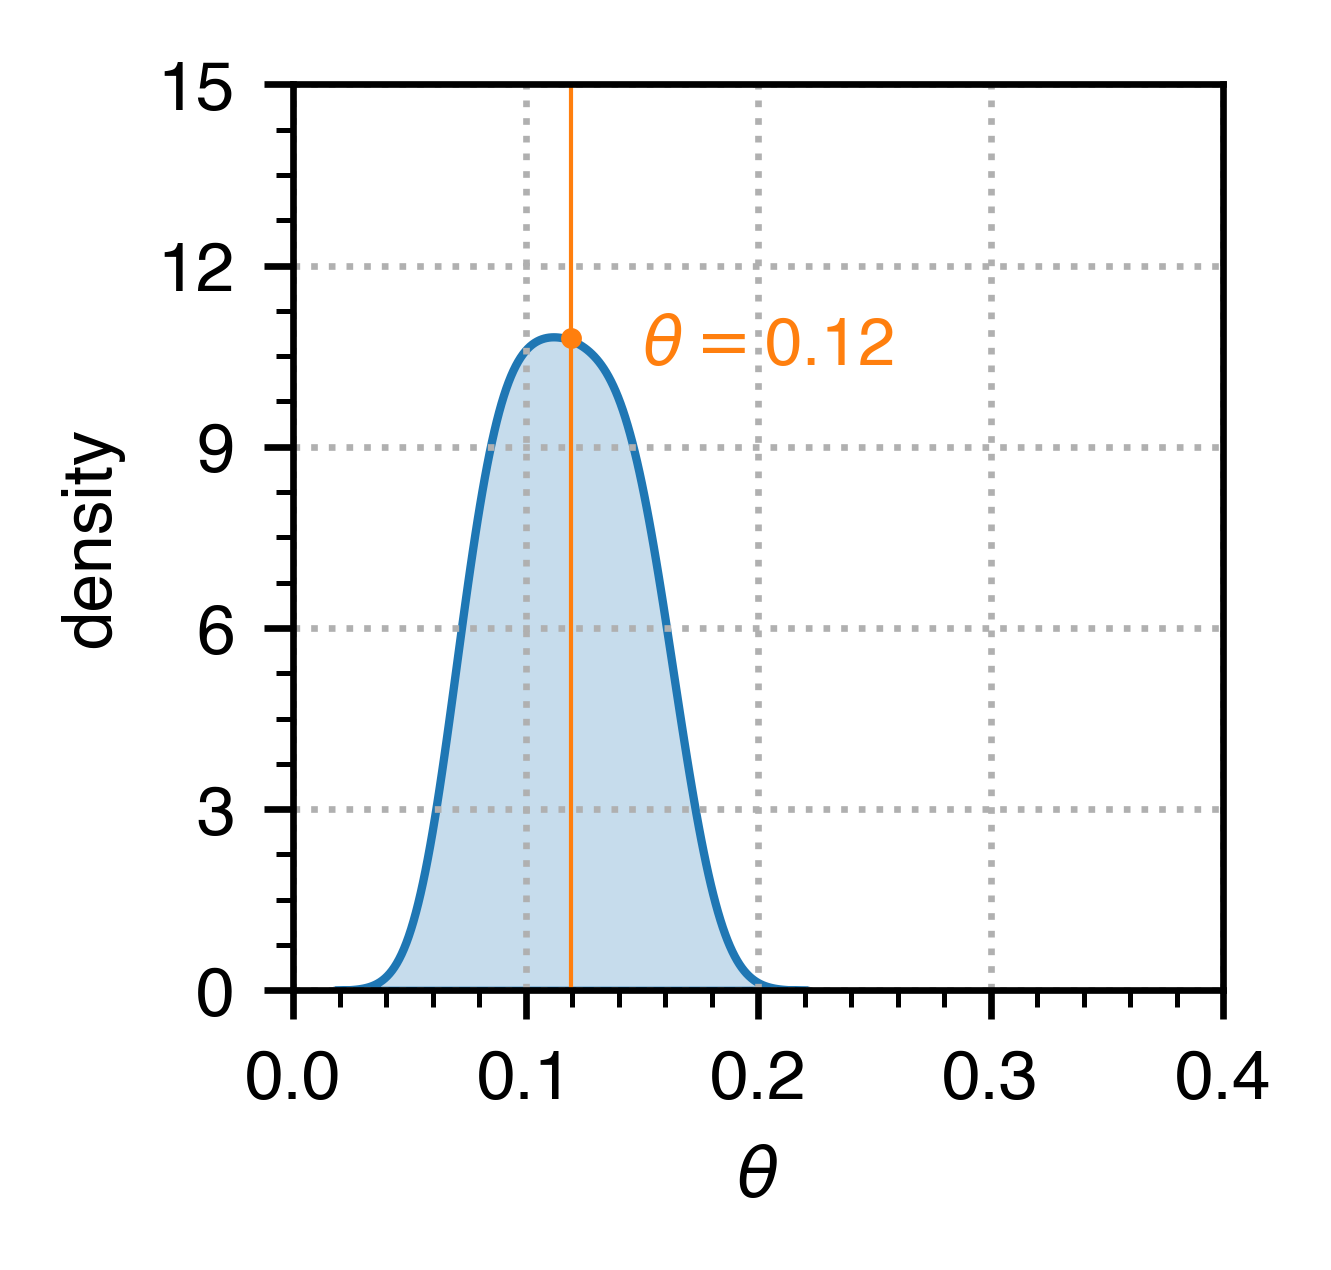

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(2, 2))
fig.dpi = 600

k_decay_list = []
for run_no in results_dict_stage2:
    k_decay_list.append(run_no['k_decay'])

df = pd.DataFrame.from_dict({'k_decay': k_decay_list}, orient='columns')

sns.kdeplot(data=df, x='k_decay', fill=True, cmap='Blues', ax=axs, bw_adjust=2)

axs.set_xlim(0, 0.4)
axs.set_ylim(0, 15)
axs.set_yticks([0, 3, 6, 9, 12, 15])
axs.set_xticks([0, 0.1, 0.2, 0.3, 0.4])
axs.set_xlabel(r'$\theta$', fontsize='small')
axs.set_ylabel('density', fontsize='small')
axs.minorticks_on()
kdecay_text = f'{map_estimate_stage2[0]:.2f}'
axs.axvline(map_estimate_stage2[0], color='#ff7f0e', linewidth=0.5)
axs.plot(map_estimate_stage2[0], 10.8, '.', color='#ff7f0e', markersize=3)
axs.text(0.15, 10.36, r'$\theta=$' + f'{kdecay_text}', fontsize=8, color='#ff7f0e')
axs.grid(True, linestyle=':')
plt.tick_params(axis='both', which='both', labelsize='small')

plt.show()

In [8]:
seed = 16
np.random.seed(seed)

ensemble_count = config['ENSEMBLE_COUNT']
reversal_count = config['REVERSAL_COUNT']
trial_count = config['TRIAL_COUNT']
tau_val = map_estimate_stage1[0]
k_val = map_estimate_stage1[1]
k_decay = map_estimate_stage2[0]

run_output_stage1 = main.run_reversal_learning(ensemble_count, reversal_count, trial_count, tau_val, k_val, k_decay)

100%|██████████| 100/100 [00:09<00:00, 10.45it/s]


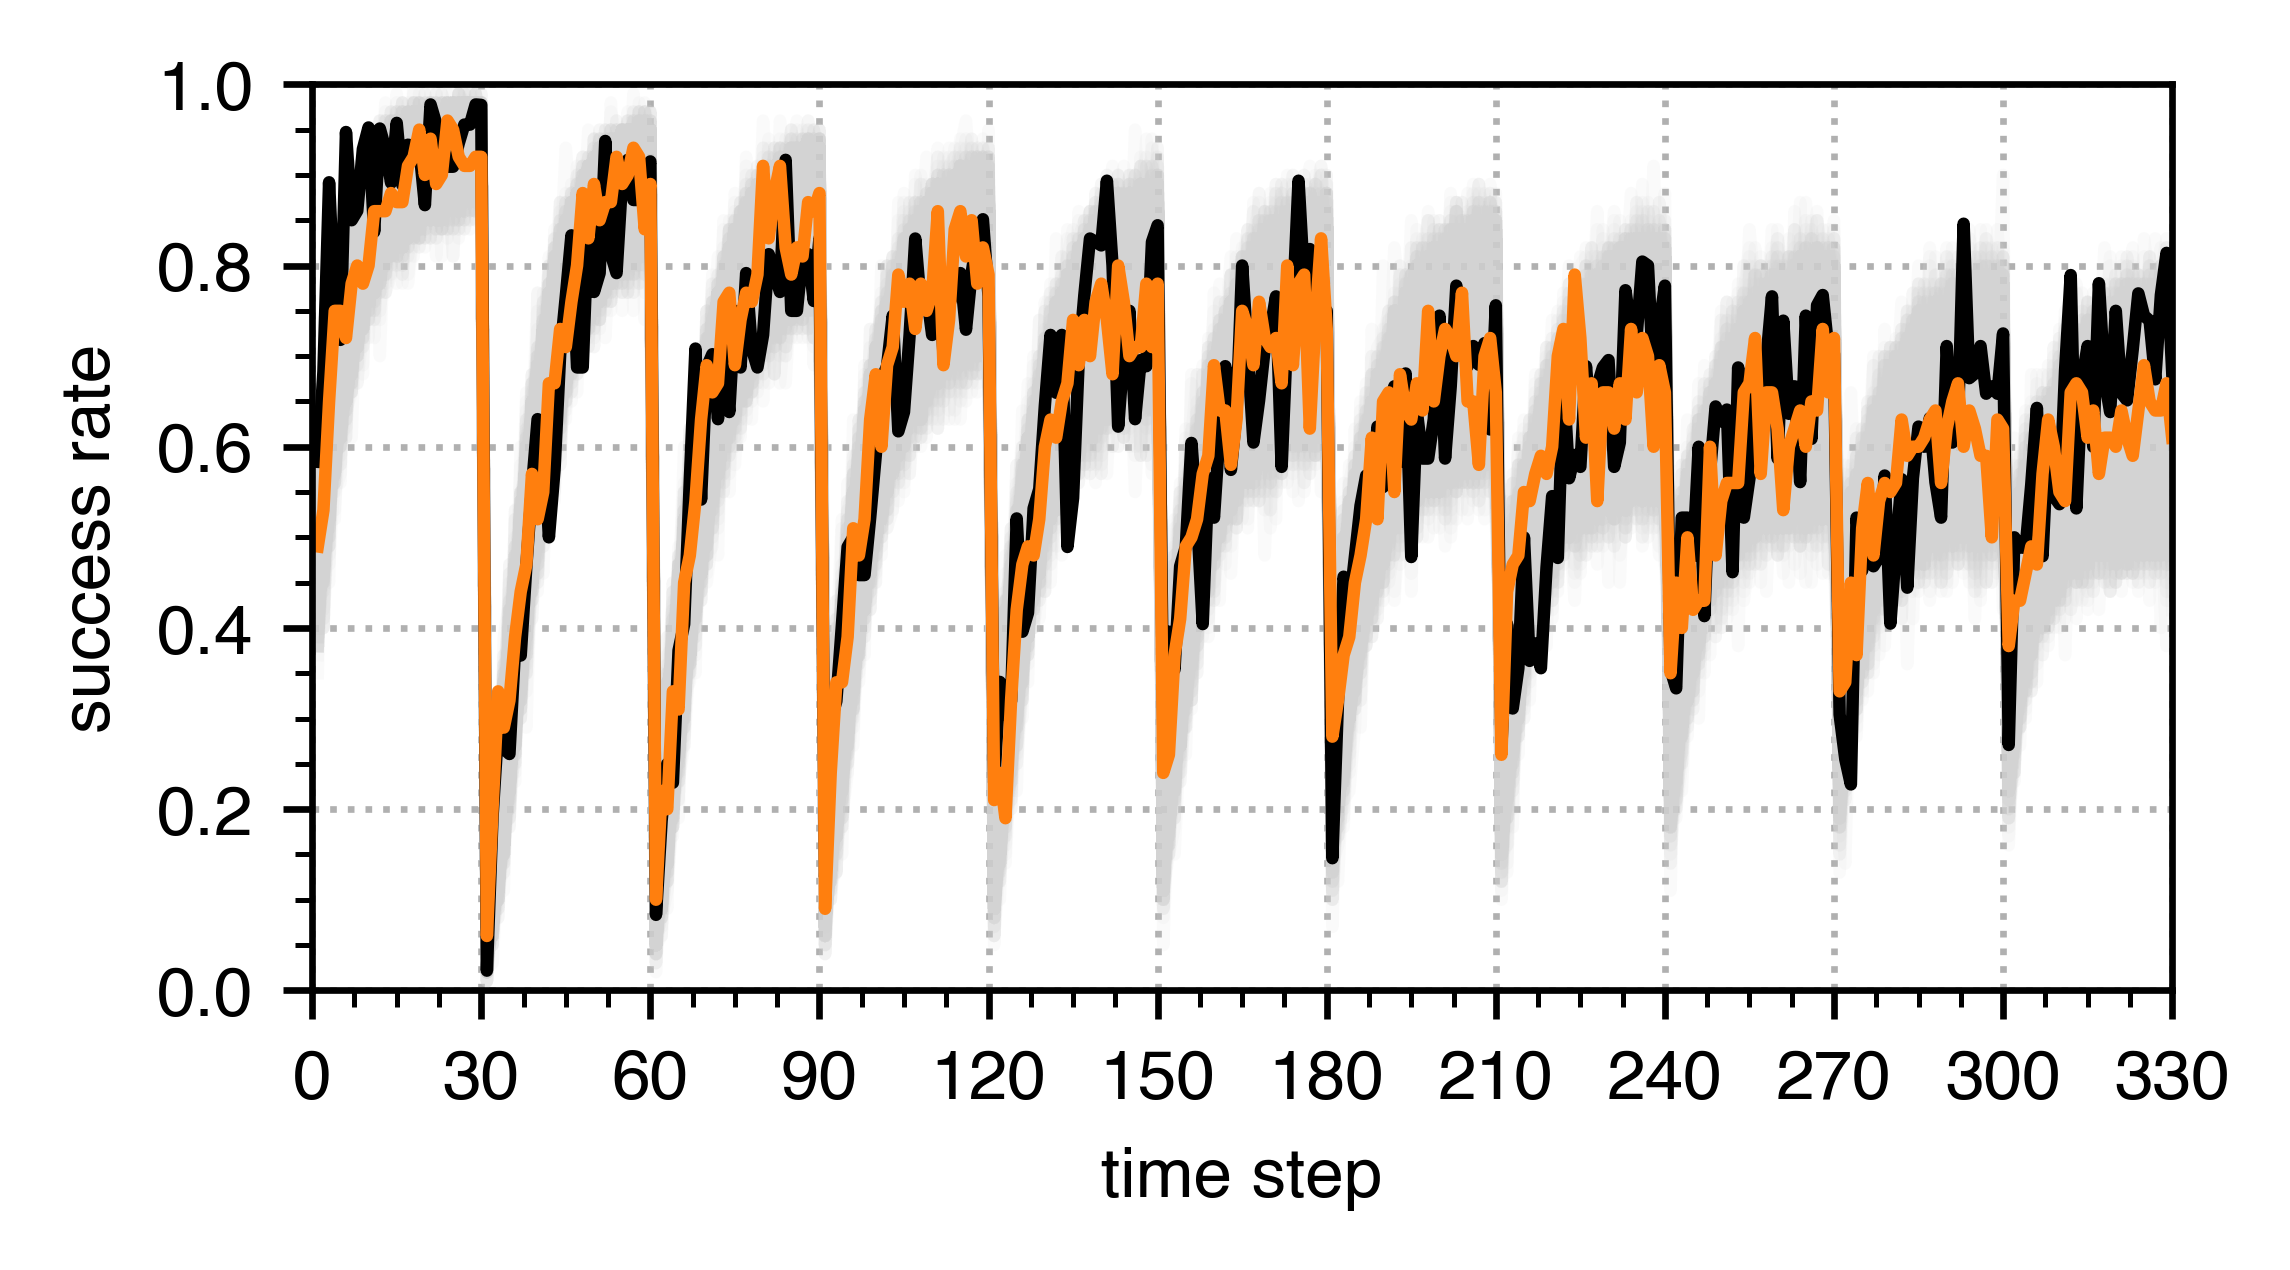

In [9]:
df_target = pd.read_csv('../data/target_data_serial.csv', header=None)
run_target = df_target[0].tolist()
run_target = run_target

run_list = []
for run_no in results_dict_stage2:
    run_list.append(run_no['run'])

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
fig.dpi = 600

for i in run_list:
    plt.plot(np.arange(1,331,1), i, color='lightgrey', linewidth=1.5, alpha=0.1)
plt.plot(np.arange(1,331,1), run_target, color='black', linewidth=1.5, label='target')
plt.plot(np.arange(1,331,1), run_output_stage1['run_stat'], color='#ff7f0e', linewidth=1.5, label='simulation')

plt.ylabel('success rate', fontsize='small')
plt.xlabel('time step', fontsize='small')
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticks(np.arange(0, 331, 30))
plt.ylim(0,1)
plt.xlim(0,330)
ax.minorticks_on()
ax.grid(which='major', linestyle=':')
plt.tick_params(axis='both', which='both', labelsize='small')

plt.show()